In [1]:
import pandas as pd

# 1. 读取TSV文件
df = pd.read_csv('Sig_Eqs.tsv', sep='\t')

# 2. 查看数据有哪些列
print("数据包含以下列:")
for col in df.columns:
    print(f"- {col}")

print("\n前3行数据预览:")
print(df.head(3))

数据包含以下列:
- Search Parameters
- Id
- Year
- Mo
- Dy
- Hr
- Mn
- Sec
- Tsu
- Vol
- Country
- Area
- Region
- Location Name
- Latitude
- Longitude
- Focal Depth (km)
- Mag
- Mw
- Ms
- Mb
- Ml
- Mfa
- Unk
- MMI Int
- Deaths
- Death Description
- Missing
- Missing Description
- Injuries
- Injuries Description
- Damage ($Mil)
- Damage Description
- Houses Destroyed
- Houses Destroyed Description
- Houses Damaged
- Houses Damaged Description
- Total Deaths
- Total Death Description
- Total Missing
- Total Missing Description
- Total Injuries
- Total Injuries Description
- Total Damage ($Mil)
- Total Damage Description
- Total Houses Destroyed
- Total Houses Destroyed Description
- Total Houses Damaged
- Total Houses Damaged Description

前3行数据预览:
  Search Parameters   Id    Year  Mo  Dy  Hr  Mn  Sec  Tsu  Vol  ...  \
0                []  NaN     NaN NaN NaN NaN NaN  NaN  NaN  NaN  ...   
1               NaN  1.0 -2150.0 NaN NaN NaN NaN  NaN  NaN  NaN  ...   
2               NaN  2.0 -2000.0 Na

In [3]:
# 3. 设置列名（根据上一步的输出调整）
# 请根据实际列名修改下面的三个变量
国家列 = 'Country'      # 改成实际的国家列名
死亡列 = 'Deaths'       # 改成实际的死亡人数列名  
年份列 = 'Year'         # 改成实际的年份列名

# 4. 数据清洗
# 把死亡人数转换成数字
df[死亡列] = pd.to_numeric(df[死亡列], errors='coerce')

# 把年份转换成数字（处理BC/AD）
def 处理年份(年份):
    年份 = str(年份)
    if 'BC' in 年份.upper():
        # 公元前年份转为负数
        数字 = ''.join([c for c in 年份 if c.isdigit()])
        return -int(数字) if 数字 else None
    else:
        # 公元年份
        数字 = ''.join([c for c in 年份 if c.isdigit()])
        return int(数字) if 数字 else None

df['处理后的年份'] = df[年份列].apply(处理年份)

# 5. 筛选公元前2150年之后的数据
筛选后数据 = df[df['处理后的年份'] >= -2150]

# 6. 按国家统计死亡总人数
各国死亡人数 = 筛选后数据.groupby(国家列)[死亡列].sum().sort_values(ascending=False)

# 7. 输出前十名国家
print("\n自公元前2150年以来地震死亡总人数前十的国家:")
print("=" * 50)
for i, (国家, 死亡人数) in enumerate(各国死亡人数.head(10).items(), 1):
    print(f"{i:2d}. {国家:<20} {int(死亡人数):>10,} 人")


自公元前2150年以来地震死亡总人数前十的国家:
 1. CHINA                 2,139,210 人
 2. TURKEY                1,199,742 人
 3. IRAN                  1,014,453 人
 4. ITALY                   498,219 人
 5. SYRIA                   419,226 人
 6. HAITI                   323,484 人
 7. AZERBAIJAN              319,251 人
 8. JAPAN                   242,445 人
 9. ARMENIA                 191,890 人
10. PAKISTAN                145,083 人


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取TSV文件
print("正在读取数据...")
df = pd.read_csv('Sig_Eqs.tsv', sep='\t')

# 2. 查看数据有哪些列
print("\n数据包含以下列:")
for col in df.columns:
    print(f"- {col}")

print("\n前3行数据预览:")
print(df.head(3))

正在读取数据...

数据包含以下列:
- Search Parameters
- Id
- Year
- Mo
- Dy
- Hr
- Mn
- Sec
- Tsu
- Vol
- Country
- Area
- Region
- Location Name
- Latitude
- Longitude
- Focal Depth (km)
- Mag
- Mw
- Ms
- Mb
- Ml
- Mfa
- Unk
- MMI Int
- Deaths
- Death Description
- Missing
- Missing Description
- Injuries
- Injuries Description
- Damage ($Mil)
- Damage Description
- Houses Destroyed
- Houses Destroyed Description
- Houses Damaged
- Houses Damaged Description
- Total Deaths
- Total Death Description
- Total Missing
- Total Missing Description
- Total Injuries
- Total Injuries Description
- Total Damage ($Mil)
- Total Damage Description
- Total Houses Destroyed
- Total Houses Destroyed Description
- Total Houses Damaged
- Total Houses Damaged Description

前3行数据预览:
  Search Parameters   Id    Year  Mo  Dy  Hr  Mn  Sec  Tsu  Vol  ...  \
0                []  NaN     NaN NaN NaN NaN NaN  NaN  NaN  NaN  ...   
1               NaN  1.0 -2150.0 NaN NaN NaN NaN  NaN  NaN  NaN  ...   
2               NaN  2.0

In [6]:
# 3. 设置列名（根据上一步的输出调整）
# 请根据实际列名修改下面的变量
震级列 = 'Mag'    # 改成实际的震级列名
年份列 = 'Year'   # 改成实际的年份列名

# 4. 数据清洗
print("\n正在处理数据...")

# 把震级转换成数字
df['震级'] = pd.to_numeric(df[震级列], errors='coerce')

# 把年份转换成数字
df['年份'] = pd.to_numeric(df[年份列], errors='coerce')

# 移除缺失值
清洗后数据 = df.dropna(subset=['震级', '年份'])
print(f"清洗后数据行数: {len(清洗后数据)}")

# 5. 筛选震级大于6.0的地震
大地震数据 = 清洗后数据[清洗后数据['震级'] > 6.0]
print(f"震级大于6.0的地震记录数: {len(大地震数据)}")

# 6. 按年份统计地震数量
每年地震数 = 大地震数据.groupby('年份').size()

print(f"\n数据时间范围: {每年地震数.index.min()} 到 {每年地震数.index.max()}")
print(f"总年份数: {len(每年地震数)}")
print(f"年平均地震数: {每年地震数.mean():.1f}")


正在处理数据...
清洗后数据行数: 4823
震级大于6.0的地震记录数: 3076

数据时间范围: -2150.0 到 2025.0
总年份数: 552
年平均地震数: 5.6



正在绘制图表...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\101304510.py:11: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\101304510.py:11: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\101304510.py:11: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\101304510.py:11: UserWarning: Glyph 38663 (\N{CJK UNIFIED IDEOGRAPH-9707}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\101304510.py:11: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\101304510.py:11: UserWarning: Glyph 37327 (\

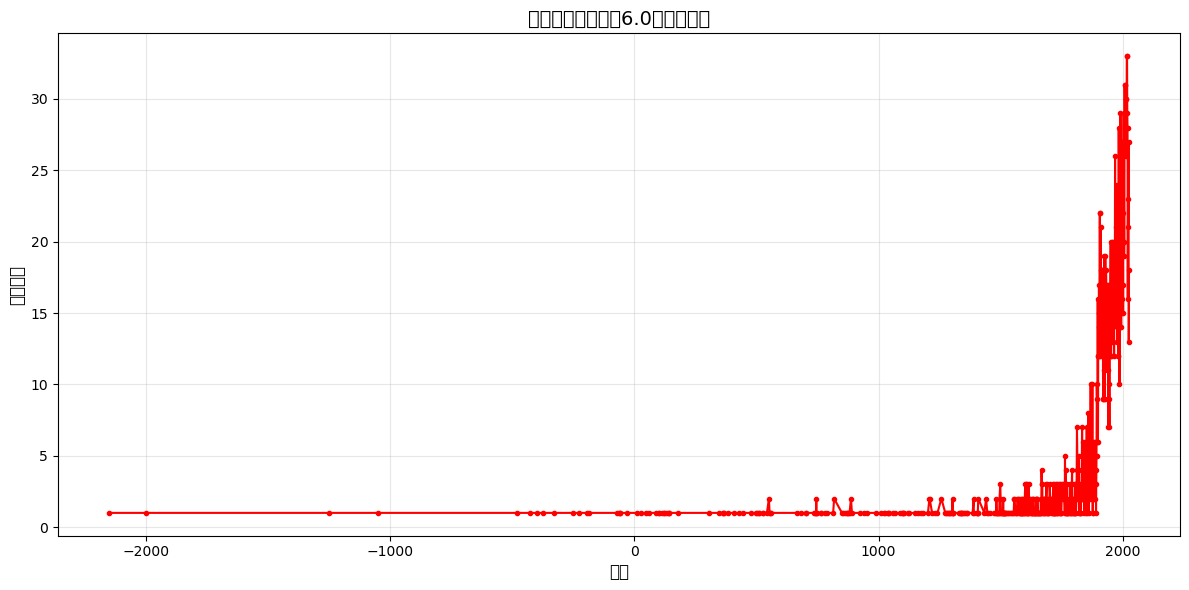

In [7]:
# 7. 绘制时间序列图
print("\n正在绘制图表...")

plt.figure(figsize=(12, 6))
plt.plot(每年地震数.index, 每年地震数.values, 
         linewidth=1.5, marker='o', markersize=3, color='red')
plt.title('全球每年震级大于6.0的地震数量', fontsize=14)
plt.xlabel('年份', fontsize=12)
plt.ylabel('地震数量', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# 1. 读取TSV文件
print("正在读取数据...")
df = pd.read_csv('Sig_Eqs.tsv', sep='\t')

# 2. 查看数据有哪些列
print("\n数据包含以下列:")
for col in df.columns:
    print(f"- {col}")

# 3. 设置列名（根据上一步的输出调整）
国家列 = 'Country'  # 改成实际的国家列名
日期列 = 'Year'     # 改成实际的日期列名  
震级列 = 'Mag'      # 改成实际的震级列名

print(f"\n使用的列: 国家='{国家列}', 日期='{日期列}', 震级='{震级列}'")

正在读取数据...

数据包含以下列:
- Search Parameters
- Id
- Year
- Mo
- Dy
- Hr
- Mn
- Sec
- Tsu
- Vol
- Country
- Area
- Region
- Location Name
- Latitude
- Longitude
- Focal Depth (km)
- Mag
- Mw
- Ms
- Mb
- Ml
- Mfa
- Unk
- MMI Int
- Deaths
- Death Description
- Missing
- Missing Description
- Injuries
- Injuries Description
- Damage ($Mil)
- Damage Description
- Houses Destroyed
- Houses Destroyed Description
- Houses Damaged
- Houses Damaged Description
- Total Deaths
- Total Death Description
- Total Missing
- Total Missing Description
- Total Injuries
- Total Injuries Description
- Total Damage ($Mil)
- Total Damage Description
- Total Houses Destroyed
- Total Houses Destroyed Description
- Total Houses Damaged
- Total Houses Damaged Description

使用的列: 国家='Country', 日期='Year', 震级='Mag'


In [16]:
# 4. 修复后的函数（避免out-of-bounds错误）
def CountEq_LargestEq(国家名称):
    """
    计算指定国家的地震总数和最大地震日期
    """
    # 筛选该国家的数据
    国家数据 = df[df[国家列] == 国家名称]
    
    # 如果没有数据，返回0
    if len(国家数据) == 0:
        return 0, "无地震记录", 0.0
    
    # 计算地震总数
    地震总数 = len(国家数据)
    
    # 找到最大震级（修复版本）
    最大震级 = 国家数据[震级列].max()
    
    # 安全地获取最大地震的日期
    最大地震数据 = 国家数据[国家数据[震级列] == 最大震级]
    if len(最大地震数据) > 0:
        最大地震日期 = 最大地震数据.iloc[0][日期列]
    else:
        最大地震日期 = "日期未知"
    
    return 地震总数, 最大地震日期, 最大震级

print("函数定义完成！")

函数定义完成！


In [17]:
# 5. 获取所有国家列表并应用函数
所有国家 = df[国家列].unique()
print(f"共有 {len(所有国家)} 个国家")

结果列表 = []

for 国家 in 所有国家:
    总数, 日期, 震级 = CountEq_LargestEq(国家)
    结果列表.append((国家, 总数, 日期, 震级))

# 6. 按地震总数降序排序
结果排序 = sorted(结果列表, key=lambda x: x[1], reverse=True)

# 7. 输出结果
print("\n" + "="*70)
print("各国地震统计（按地震总数降序排列）")
print("="*70)

for i, (国家, 总数, 日期, 震级) in enumerate(结果排序, 1):
    print(f"{i:3d}. {国家:<20} {总数:>4d}次 | 最大{震级:>4.1f}级 | {日期}")

共有 159 个国家

各国地震统计（按地震总数降序排列）
  1. CHINA                 623次 | 最大 8.5级 | 1668.0
  2. JAPAN                 424次 | 最大 9.1级 | 2011.0
  3. INDONESIA             421次 | 最大 9.1级 | 2004.0
  4. IRAN                  388次 | 最大 7.9级 | 856.0
  5. TURKEY                358次 | 最大 7.8级 | 1939.0
  6. ITALY                 333次 | 最大 7.5级 | 1915.0
  7. GREECE                289次 | 最大 8.0级 | 365.0
  8. USA                   280次 | 最大 9.2级 | 1964.0
  9. PHILIPPINES           230次 | 最大 8.7级 | 1897.0
 10. MEXICO                214次 | 最大 8.6级 | 1787.0
 11. CHILE                 200次 | 最大 9.5级 | 1960.0
 12. PERU                  194次 | 最大 8.8级 | 1716.0
 13. RUSSIA                158次 | 最大 9.0级 | 1952.0
 14. PAPUA NEW GUINEA      107次 | 最大 8.2级 | 1919.0
 15. INDIA                 102次 | 最大 8.6级 | 1950.0
 16. TAIWAN                101次 | 最大 8.2级 | 1920.0
 17. COLOMBIA               82次 | 最大 8.2级 | 1826.0
 18. NEW ZEALAND            72次 | 最大 8.0级 | 1826.0
 19. ECUADOR                69次 | 最大 8.8级 | 1906.0
 20

In [18]:
from pathlib import Path
import pandas as pd
import matplotlib
matplotlib.use("Agg")  # 统一使用非交互后端，兼容脚本/Notebook
import matplotlib.pyplot as plt
from IPython.display import display, Image

# 统一基准目录：Notebook 环境下无 __file__ 时使用当前工作目录
BASE_DIR = Path(__file__).resolve().parent if "__file__" in globals() else Path.cwd()
OUTPUT_DIR = BASE_DIR / "outputs"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print("工作目录:", BASE_DIR)
print("输出目录:", OUTPUT_DIR)

工作目录: C:\Users\Lenovo
输出目录: C:\Users\Lenovo\outputs


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3985423222.py:72: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3985423222.py:72: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3985423222.py:72: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3985423222.py:72: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3985423222.py:72: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3985423222.py:72: UserWarning: Glyph 36

[风速] 加工后记录数: 111346
[风速] 月均风速表 -> C:\Users\Lenovo\outputs\monthly_mean_wind.csv
[风速] 可视化图表 -> C:\Users\Lenovo\outputs\monthly_wind_speed.png


,Month,MeanWind_mps
0,2010-01-01,2.756267
1,2010-02-01,3.388060
2,2010-03-01,3.360700
3,2010-04-01,3.191341
4,2010-05-01,3.293640


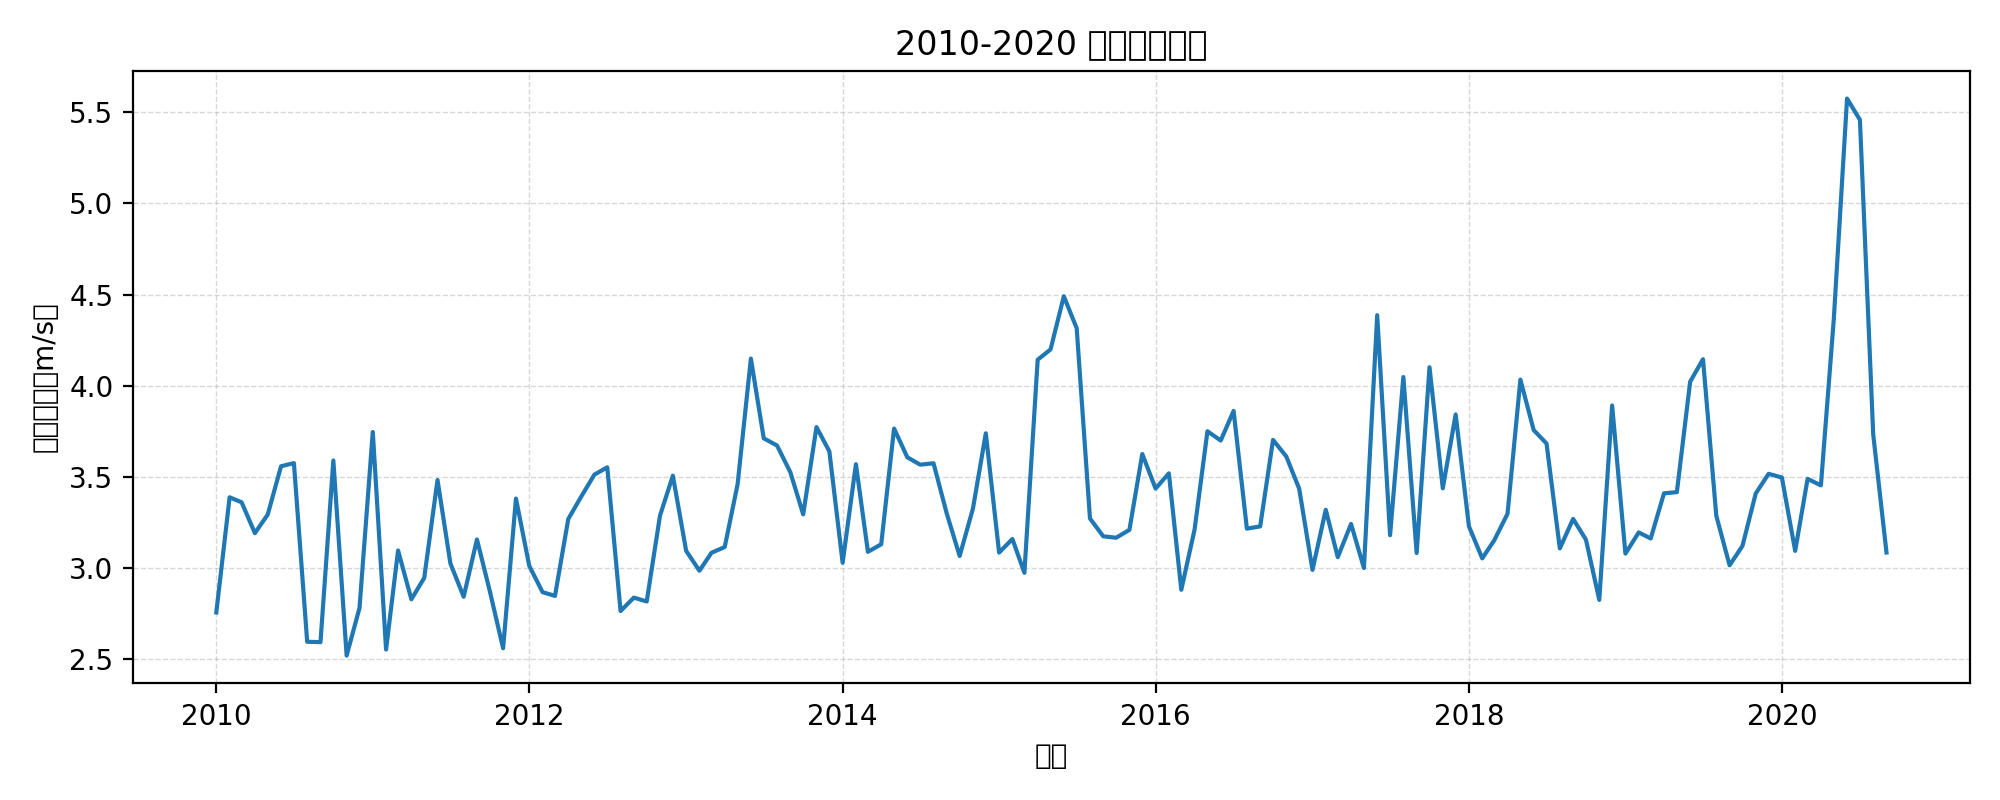

In [19]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image

START_DATE = pd.Timestamp("2010-01-01")
END_DATE = pd.Timestamp("2020-12-31")


def parse_wnd_speed(value: object) -> float | None:
    if not isinstance(value, str) or not value:
        return None
    parts = [p.strip() for p in value.split(",")]
    if len(parts) < 5:
        return None
    speed_token = parts[3]
    if not speed_token or speed_token.startswith("9999"):
        return None
    try:
        return float(speed_token) / 10.0
    except ValueError:
        return None


def load_dataset(csv_path: Path) -> pd.DataFrame:
    df = pd.read_csv(csv_path, low_memory=False)
    if "DATE" not in df.columns or "WND" not in df.columns:
        raise KeyError("CSV must contain DATE and WND columns")
    df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
    df["wind_mps"] = df["WND"].apply(parse_wnd_speed)
    df = df.dropna(subset=["DATE", "wind_mps"])
    mask = (df["DATE"] >= START_DATE) & (df["DATE"] <= END_DATE)
    return df.loc[mask].copy()


def compute_monthly_mean(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        raise RuntimeError("no wind observations available in the selected period")
    monthly = (
        df.groupby(df["DATE"].dt.to_period("M"))["wind_mps"]
        .mean()
        .reset_index()
        .rename(columns={"DATE": "Month", "wind_mps": "MeanWind_mps"})
    )
    monthly["Month"] = monthly["Month"].dt.to_timestamp()
    return monthly


def run_wind() -> None:
    csv_path = BASE_DIR / "2281305.csv"
    if not csv_path.exists():
        print("[风速] 未找到 2281305.csv，跳过风速分析。")
        return

    df = load_dataset(csv_path)
    monthly = compute_monthly_mean(df)

    data_path = OUTPUT_DIR / "monthly_mean_wind.csv"
    monthly.rename(
        columns={"Month": "月份", "MeanWind_mps": "平均风速（m/s）"}
    ).to_csv(data_path, index=False, encoding="utf-8-sig")

    chart_path = OUTPUT_DIR / "monthly_wind_speed.png"
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(monthly["月份" if "月份" in monthly.columns else "Month"],
            monthly["平均风速（m/s）" if "平均风速（m/s）" in monthly.columns else "MeanWind_mps"],
            linewidth=1.5)
    ax.set_xlabel("月份")
    ax.set_ylabel("平均风速（m/s）")
    ax.set_title("2010-2020 月均风速变化")
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
    fig.tight_layout()
    fig.savefig(chart_path, dpi=200)
    plt.close(fig)

    print("[风速] 加工后记录数:", len(df))
    print("[风速] 月均风速表 ->", data_path)
    print("[风速] 可视化图表 ->", chart_path)

    # Notebook 展示
    display(monthly.head())
    if chart_path.exists():
        display(Image(filename=str(chart_path)))


# 执行风速分析
run_wind()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3940691755.py:52: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3940691755.py:52: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3940691755.py:52: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3940691755.py:52: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3940691755.py:52: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\3940691755.py:52: UserWarning: Glyph 24

[温度] 记录总数: 2108
[温度] 摘要表 -> C:\Users\Lenovo\outputs\climate_summary.csv
[温度] 明细表 -> C:\Users\Lenovo\outputs\monthly_anomalies.csv
[温度] 可视化图 -> C:\Users\Lenovo\outputs\temperature_anomaly.png


,序列开始,序列结束,平均距平（℃）,最高距平（℃）,最高值日期,最低距平（℃）,最低值日期
0,1850-01-01,2025-08-01,0.066176,1.44,2023-09-01,-0.74,1916-12-01


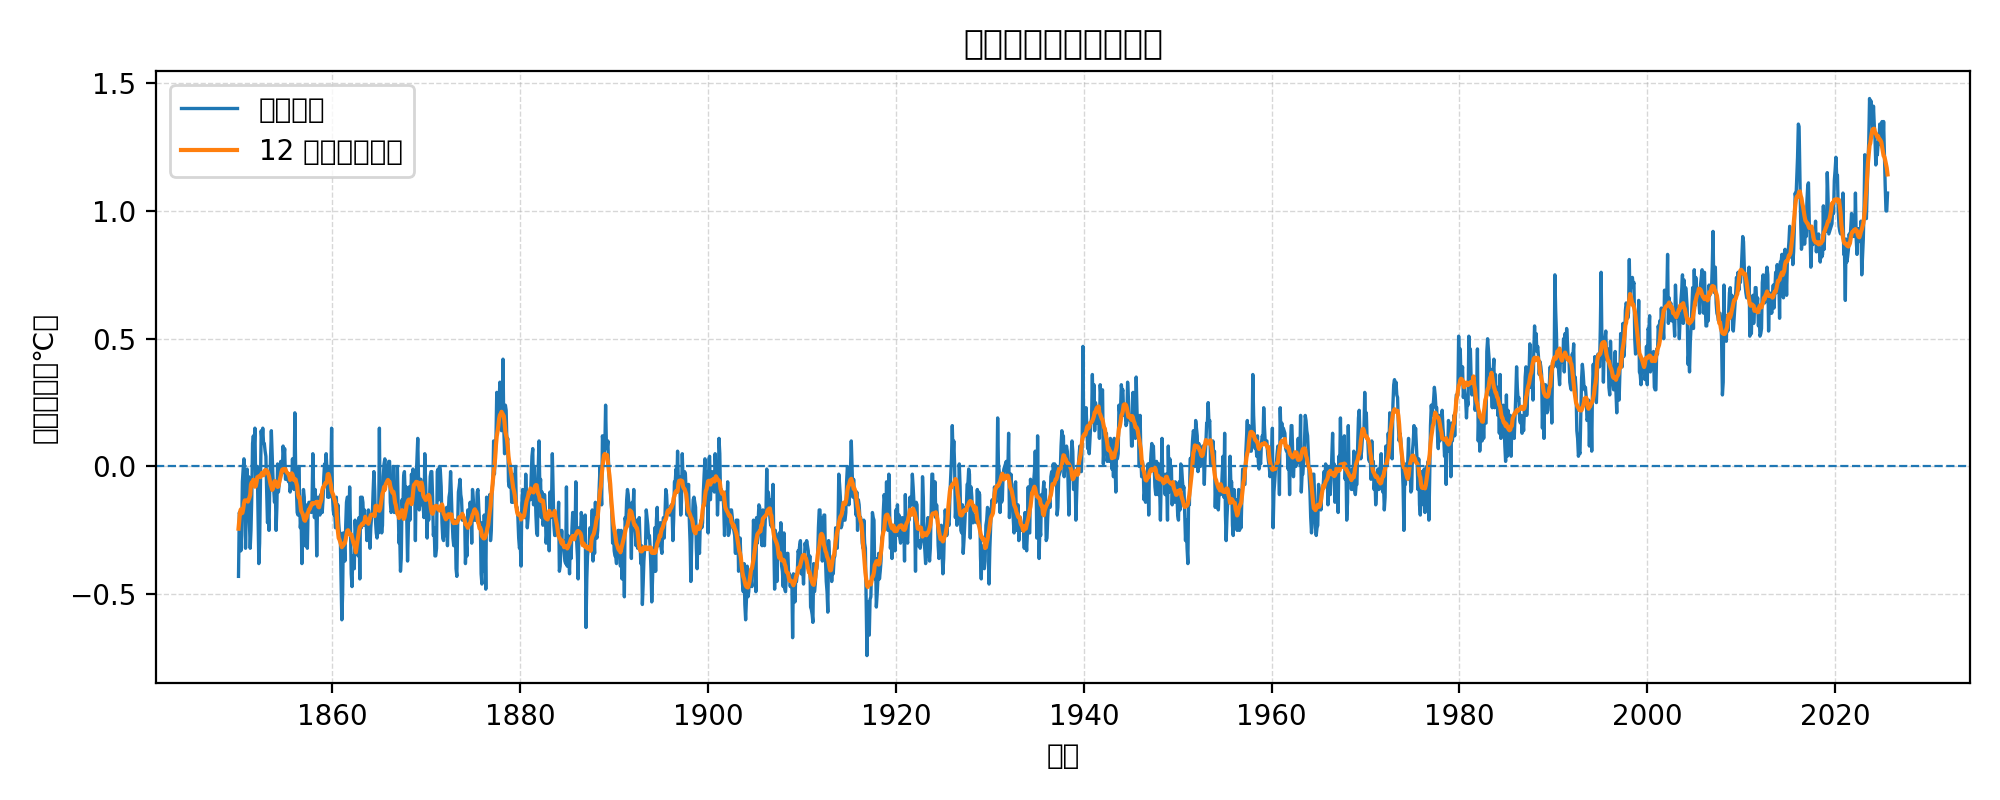

In [20]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image


def load_series(csv_path: Path) -> pd.DataFrame:
    df = pd.read_csv(csv_path, comment="#")
    df = df.rename(columns=str.strip)
    if "Date" not in df.columns or "Anomaly" not in df.columns:
        raise KeyError("CSV must include Date and Anomaly columns")
    df["Date"] = pd.to_datetime(df["Date"].astype(str), format="%Y%m", errors="coerce")
    df["Anomaly"] = pd.to_numeric(df["Anomaly"], errors="coerce")
    df = df.dropna(subset=["Date", "Anomaly"]).sort_values("Date").reset_index(drop=True)
    df["Rolling12"] = df["Anomaly"].rolling(window=12, min_periods=6, center=True).mean()
    return df


def summarize(df: pd.DataFrame) -> pd.DataFrame:
    max_idx = df["Anomaly"].idxmax()
    min_idx = df["Anomaly"].idxmin()
    summary = {
        "series_start": df["Date"].iloc[0].date(),
        "series_end": df["Date"].iloc[-1].date(),
        "avg_anomaly": df["Anomaly"].mean(),
        "max_anomaly": df["Anomaly"].iloc[max_idx],
        "max_anomaly_date": df["Date"].iloc[max_idx].date(),
        "min_anomaly": df["Anomaly"].iloc[min_idx],
        "min_anomaly_date": df["Date"].iloc[min_idx].date(),
    }
    return pd.DataFrame([summary])


def run_temp() -> None:
    csv_path = BASE_DIR / "ncei_global_tavg_land_ocean_monthly.csv"
    if not csv_path.exists():
        print("[温度] 未找到 ncei_global_tavg_land_ocean_monthly.csv，跳过温度分析。")
        return

    df = load_series(csv_path)

    chart_path = OUTPUT_DIR / "temperature_anomaly.png"
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(df["Date"], df["Anomaly"], label="月度距平", linewidth=1.2)
    ax.plot(df["Date"], df["Rolling12"], label="12 个月滑动均值", linewidth=1.5)
    ax.axhline(0, linewidth=0.8, linestyle="--")
    ax.set_xlabel("年份")
    ax.set_ylabel("温度距平（℃）")
    ax.set_title("全球陆海表面温度距平")
    ax.legend()
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
    fig.tight_layout()
    fig.savefig(chart_path, dpi=200)
    plt.close(fig)

    summary_path = OUTPUT_DIR / "climate_summary.csv"
    data_path = OUTPUT_DIR / "monthly_anomalies.csv"

    summary_export = summarize(df).rename(
        columns={
            "series_start": "序列开始",
            "series_end": "序列结束",
            "avg_anomaly": "平均距平（℃）",
            "max_anomaly": "最高距平（℃）",
            "max_anomaly_date": "最高值日期",
            "min_anomaly": "最低距平（℃）",
            "min_anomaly_date": "最低值日期",
        }
    )
    summary_export.to_csv(summary_path, index=False, encoding="utf-8-sig")

    data_export = df.rename(
        columns={
            "Date": "月份",
            "Anomaly": "温度距平（℃）",
            "Rolling12": "12 个月滑动均值（℃）",
        }
    )
    data_export.to_csv(data_path, index=False, encoding="utf-8-sig")

    print("[温度] 记录总数:", len(df))
    print("[温度] 摘要表 ->", summary_path)
    print("[温度] 明细表 ->", data_path)
    print("[温度] 可视化图 ->", chart_path)

    # Notebook 展示
    display(summary_export)
    if chart_path.exists():
        display(Image(filename=str(chart_path)))


# 执行温度距平分析
run_temp()